In [ ]:
# Importing required Libraries

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Read data file
df=pd.read_csv('/content/day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2/1/2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,3/1/2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,4/1/2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,5/1/2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [ ]:
#lets remove Casual and Registered field
df.drop(['casual'],axis=1,inplace=True)
df.drop(['registered'],axis=1,inplace=True)
df.drop(['dteday'],axis=1,inplace=True)

In [ ]:
df.head()


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,2,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,3,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,4,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,5,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [ ]:
#Checking the spread of numerical columns
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [ ]:
df.shape

(730, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  cnt         730 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 74.3 KB


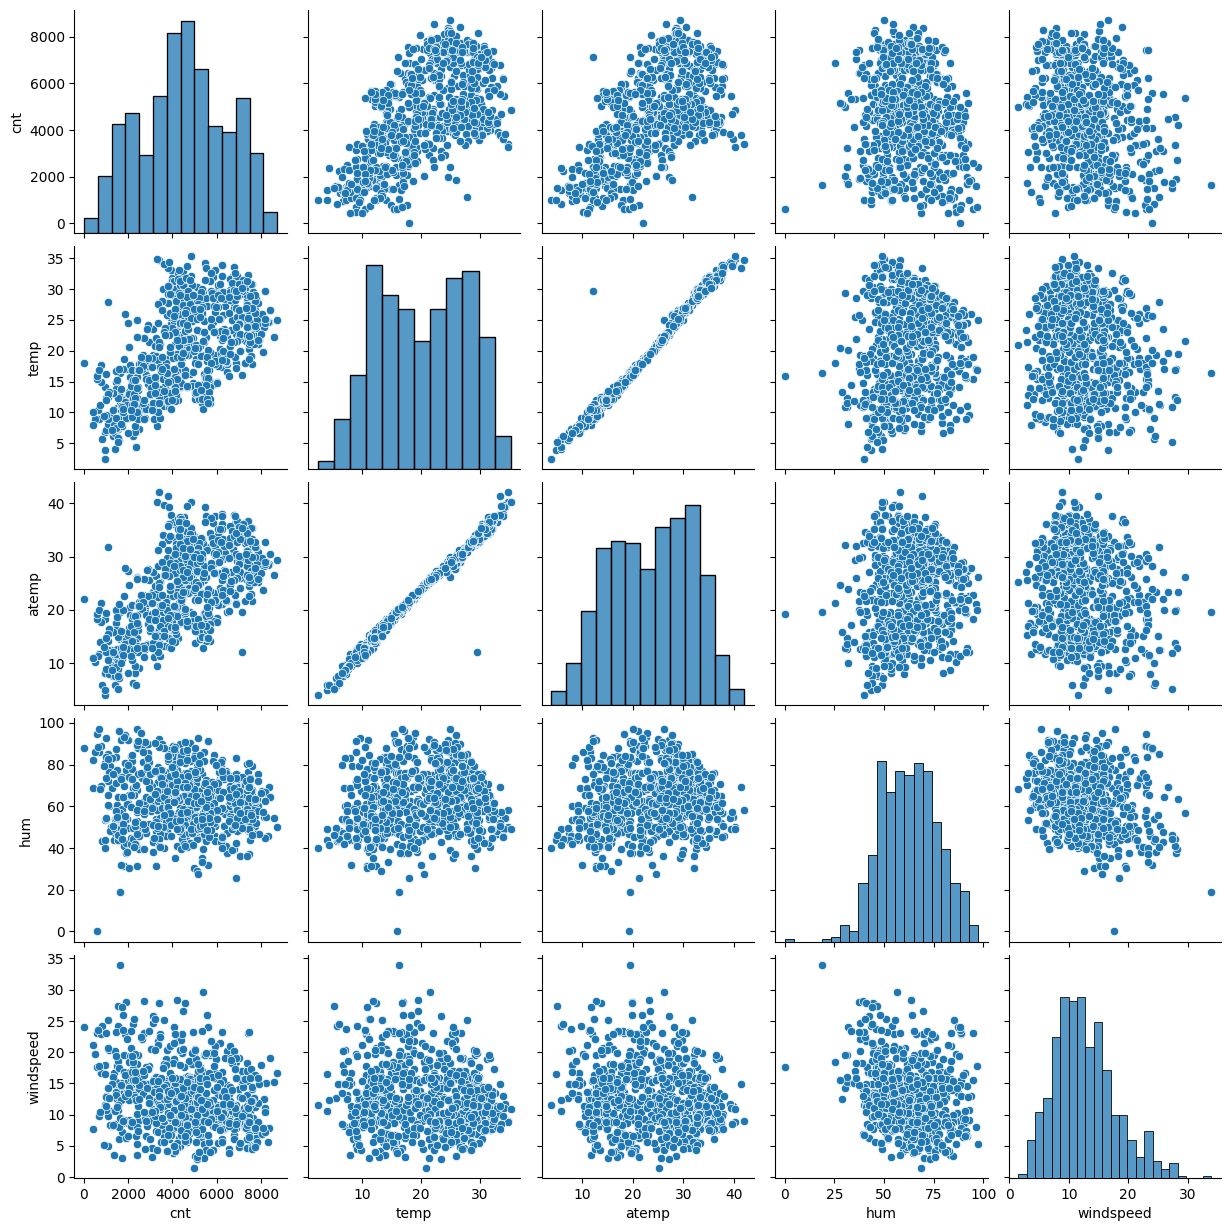

In [ ]:
# Pair Plot for numerical variables

vars=["cnt","temp","atemp","hum","windspeed"]
sns.pairplot(df[vars])
plt.show()

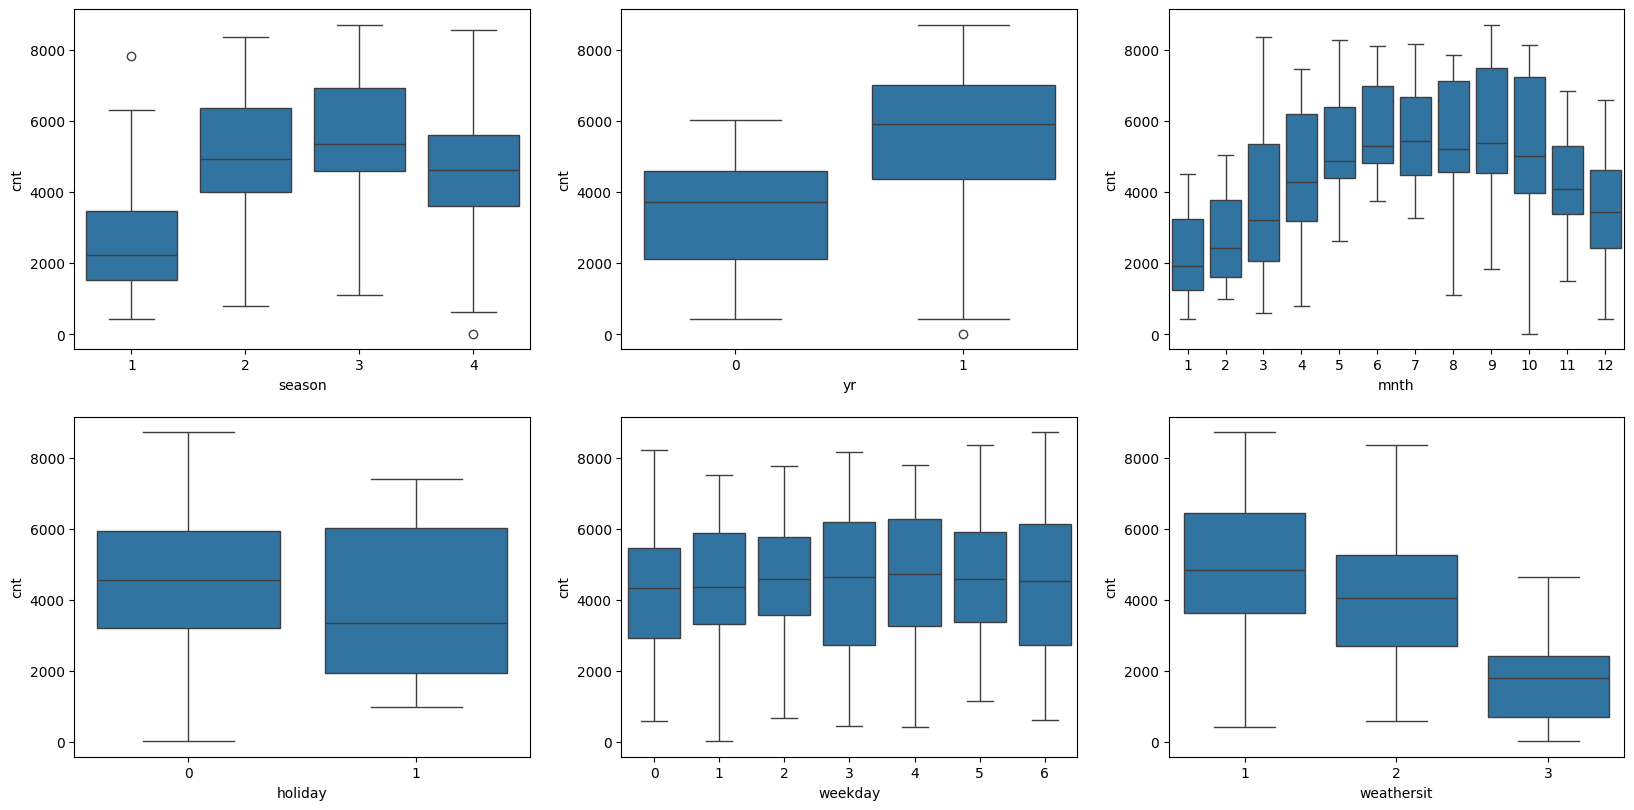

In [ ]:
# Box Plots for categorical variables

plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x='season',y='cnt',data=df)
plt.subplot(3,3,2)
sns.boxplot(x='yr',y='cnt',data=df)
plt.subplot(3,3,3)
sns.boxplot(x='mnth',y='cnt',data=df)
plt.subplot(3,3,4)
sns.boxplot(x='holiday',y='cnt',data=df)
plt.subplot(3,3,5)
sns.boxplot(x='weekday',y='cnt',data=df)
plt.subplot(3,3,6)
sns.boxplot(x='weathersit',y='cnt',data=df)
plt.show()

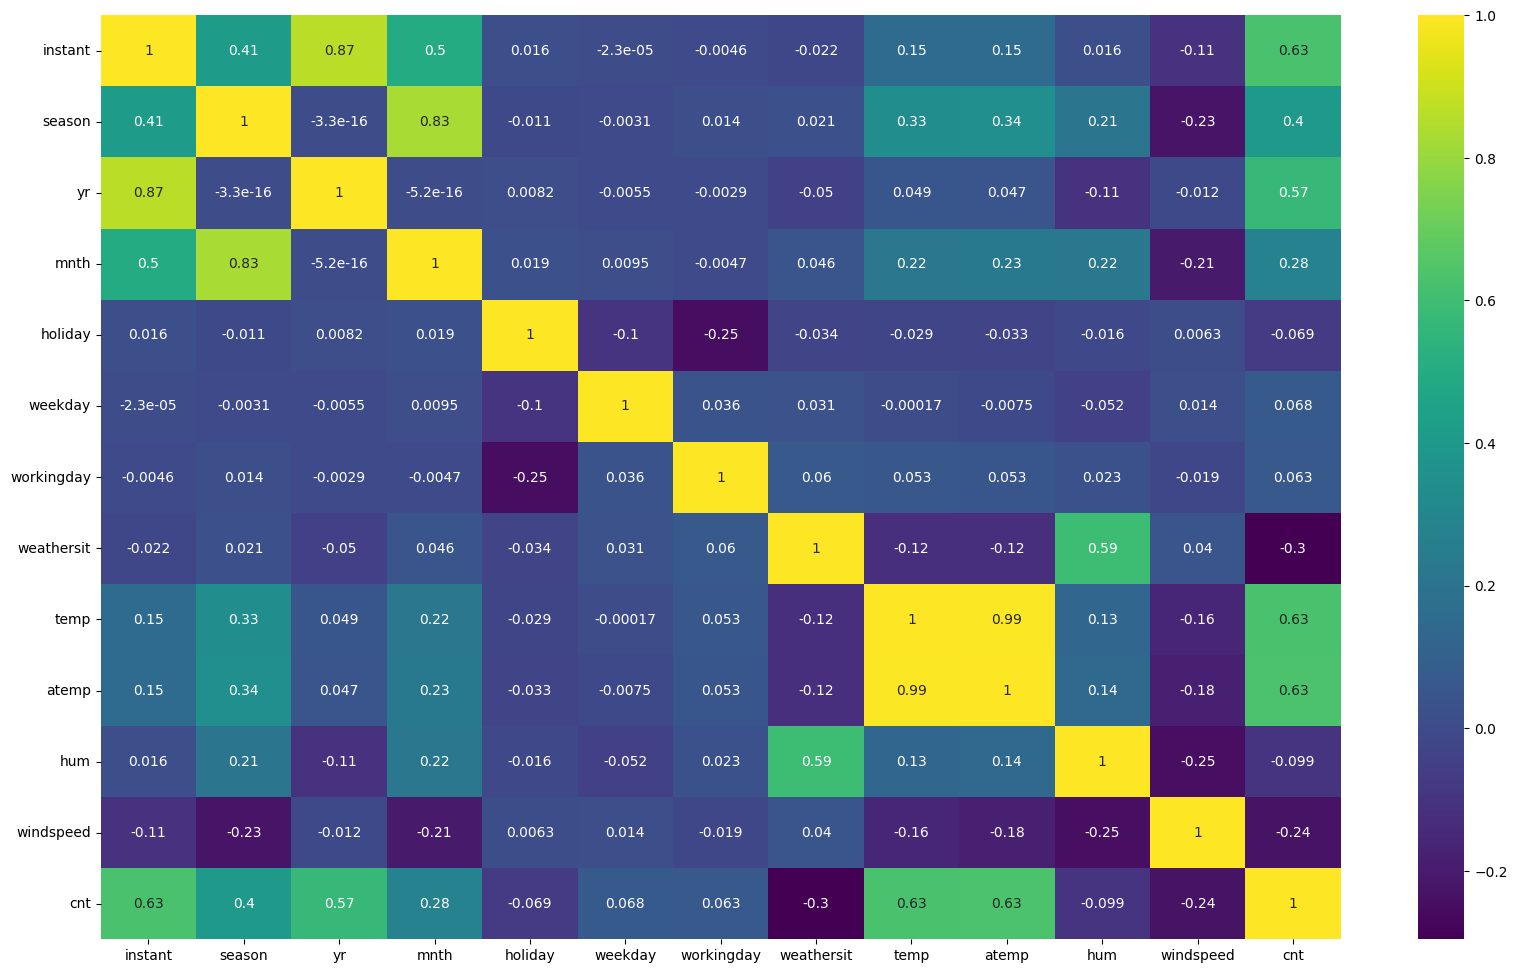

In [ ]:
#Visualizing corelations among the variables using a heatmap

plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.show()

In [ ]:
#Inferences from EDA of categorical and numerical variables:
#1.We observe that there is a increase in customer in  seassion i.e. summer, fall and winter
#2. There is a year on Year increase in demand
#3. Feb to Oct , there is a increase trend in customer
#4.Temp is positively corelated
#5. Weekdays or weekends do not show any specific trend here.

In [ ]:
#lets remove dtedate- duplicate
#df.drop(['dteday'],axis=1,inplace=True)

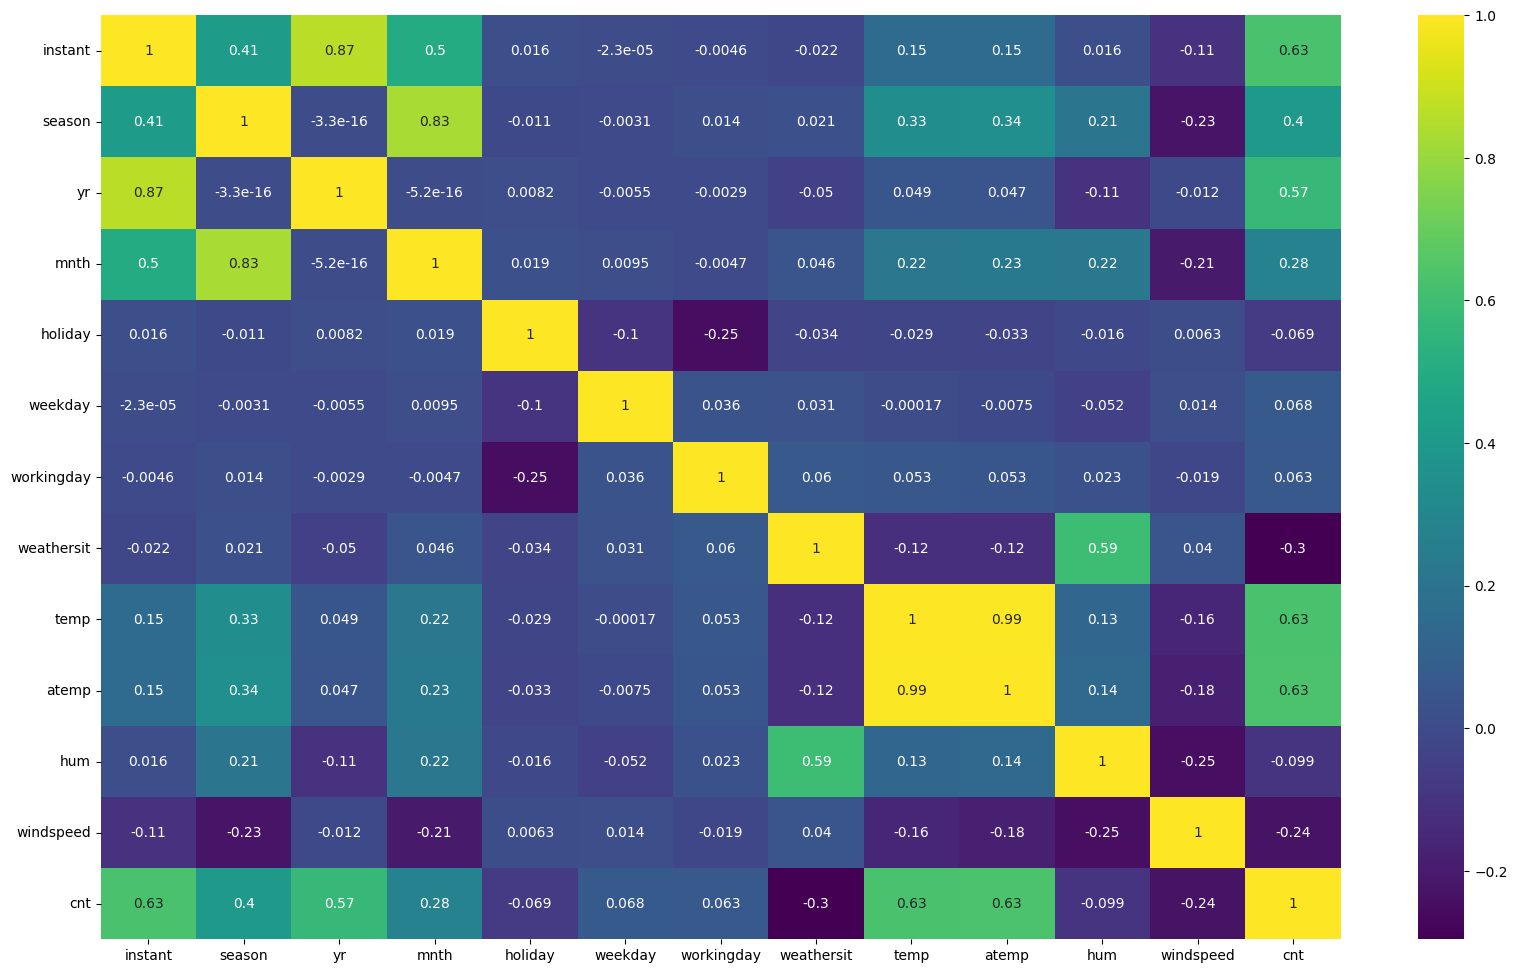

In [ ]:
#Visualizing corelations among the variables using a heatmap

plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.show()

In [ ]:
# From the heatmap, we can infer that the following variables show the most corelation with the target variable
#temperature
#season...
#month
#instant


In [ ]:
# Imputing season column codes with their descriptions
df.season=df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
df.season.value_counts()

,count
season,
fall,188
summer,184
spring,180
winter,178


In [ ]:
# Getting dummy variable for season variable
season=pd.get_dummies(df.season,dtype=int, drop_first=True) #Dropping the first dummy variable

In [ ]:
# Checking dummy variable for season
season.describe()

,spring,summer,winter
count,730.000000,730.000000,730.000000
mean,0.246575,0.252055,0.243836
std,0.431313,0.434490,0.429689
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000


In [ ]:
# Concatinating season to the original dataframe
df=pd.concat([df,season], axis=1)
df.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,1,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,2,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,3,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,4,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,5,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [ ]:
# checking weathersit column codes with their descriptions

df.weathersit.value_counts()

,count
weathersit,
1,463
2,246
3,21


In [ ]:
# imputing weathersit column codes with their descriptions

df.weathersit=df.weathersit.map({1:'clear', 2:'misty', 3:'cloudy'})

In [ ]:
# Checking dummy variable for weathersit

df.weathersit.value_counts()

,count
weathersit,
clear,463
misty,246
cloudy,21


In [ ]:
# Getting dummy variable for season variable

weathersit=pd.get_dummies(df.weathersit,dtype=int, drop_first=True) # Dropping the first dummy variable

In [ ]:
# Checking dummy variable for season

weathersit.describe()

,cloudy,misty
count,730.000000,730.000000
mean,0.028767,0.336986
std,0.167266,0.473004
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,1.000000
max,1.000000,1.000000


In [ ]:
# Concatinating weathersit to the original dataframe

df=pd.concat([df,weathersit], axis=1)
df.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter,cloudy,misty
0,1,spring,0,1,0,6,0,misty,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1
1,2,spring,0,1,0,0,0,misty,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1
2,3,spring,0,1,0,1,1,clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0
3,4,spring,0,1,0,2,1,clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0
4,5,spring,0,1,0,3,1,clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0


In [ ]:
# imputing month column codes with their descriptions

df.mnth=df.mnth.map({1:'jan', 2:'feb', 3:'mar',4:'apr',5:'may',6:'jun',
                     7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [ ]:
df.mnth.value_counts()

,count
mnth,
jan,62
mar,62
may,62
jul,62
aug,62
oct,62
dec,62
apr,60
jun,60


In [ ]:
# Getting dummy variable for month variable

mnth=pd.get_dummies(df.mnth,dtype = int, drop_first=True) # Dropping the first dummy variable
mnth.head()

,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
# Concatinating mnth to the original dataframe

df=pd.concat([df,mnth], axis=1)
df.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,1,spring,0,jan,0,6,0,misty,14.110847,18.18125,...,0,0,1,0,0,0,0,0,0,0
1,2,spring,0,jan,0,0,0,misty,14.902598,17.68695,...,0,0,1,0,0,0,0,0,0,0
2,3,spring,0,jan,0,1,1,clear,8.050924,9.47025,...,0,0,1,0,0,0,0,0,0,0
3,4,spring,0,jan,0,2,1,clear,8.200000,10.60610,...,0,0,1,0,0,0,0,0,0,0
4,5,spring,0,jan,0,3,1,clear,9.305237,11.46350,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
# imputing weekday column codes with their descriptions

df.weekday=df.weekday.map({0:'mon', 1:'tues', 2:'wed',3:'thurs',4:'fri',5:'sat',6:'sun'})

In [ ]:
df.weekday.value_counts()

,count
weekday,
sun,105
mon,105
tues,105
wed,104
fri,104
sat,104
thurs,103


In [ ]:
# Getting dummy variable for weekday variable

weekday=pd.get_dummies(df.weekday, dtype = int, drop_first=True)
weekday.head()
#We would not need all the 7 days here, we will drop off one day

,mon,sat,sun,thurs,tues,wed
0,0,0,1,0,0,0
1,1,0,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0


In [ ]:
# Concatinating mnth to the original dataframe
df=pd.concat([df,weekday], axis=1)
df.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,...,may,nov,oct,sep,mon,sat,sun,thurs,tues,wed
0,1,spring,0,jan,0,sun,0,misty,14.110847,18.18125,...,0,0,0,0,0,0,1,0,0,0
1,2,spring,0,jan,0,mon,0,misty,14.902598,17.68695,...,0,0,0,0,1,0,0,0,0,0
2,3,spring,0,jan,0,tues,1,clear,8.050924,9.47025,...,0,0,0,0,0,0,0,0,1,0
3,4,spring,0,jan,0,wed,1,clear,8.200000,10.60610,...,0,0,0,0,0,0,0,0,0,1
4,5,spring,0,jan,0,thurs,1,clear,9.305237,11.46350,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
# Dropping season and weathersit
df.drop(columns=['season','weathersit','mnth','weekday'], inplace=True)

In [ ]:
df.head()



,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,...,may,nov,oct,sep,mon,sat,sun,thurs,tues,wed
0,1,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,0,0,0,0,1,0,0,0
1,2,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,0,0,1,0,0,0,0,0
2,3,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,0,0,0,0,0,0,0,1,0
3,4,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,...,0,0,0,0,0,0,0,0,0,1
4,5,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
#Splitting the data into test and train datasets
#loading libraries from sklearn

from sklearn.model_selection import train_test_split

In [ ]:
np.random.seed(0)

In [ ]:
df_train, df_test = train_test_split(df, train_size=0.7, test_size=0.3, random_state=50)

In [ ]:
# Checking the shape of train dataset

df_train.shape

(510, 31)

In [ ]:
# Checking the shape of train dataset

df_test.shape

(219, 31)

In [ ]:
#Resclaing the feature variables
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [ ]:
# Applying fit_transform to normalize temp, atemp, hum and windspeed numerical columns

rescalevar=['temp','hum','windspeed','cnt']
df_train[rescalevar]=scaler.fit_transform(df_train[rescalevar])

In [ ]:
# Checking minimum and maximum values of the normalized variables

df_train.describe()

,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,...,may,nov,oct,sep,mon,sat,sun,thurs,tues,wed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,360.482353,0.482353,0.023529,0.705882,0.552680,23.466580,0.644848,0.318203,0.509945,0.245098,...,0.100000,0.086275,0.086275,0.064706,0.135294,0.143137,0.135294,0.139216,0.152941,0.149020
std,211.897311,0.500179,0.151726,0.456092,0.230600,7.992231,0.149640,0.167086,0.223408,0.430568,...,0.300295,0.281045,0.281045,0.246248,0.342373,0.350557,0.342373,0.346511,0.360284,0.356457
min,1.000000,0.000000,0.000000,0.000000,0.000000,3.953480,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,174.250000,0.000000,0.000000,0.000000,0.343347,16.319000,0.524581,0.197916,0.350523,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,351.500000,0.000000,0.000000,1.000000,0.553497,23.878750,0.648347,0.295422,0.516222,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,541.750000,1.000000,0.000000,1.000000,0.757231,30.159900,0.752576,0.406471,0.672141,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,730.000000,1.000000,1.000000,1.000000,1.000000,39.741450,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


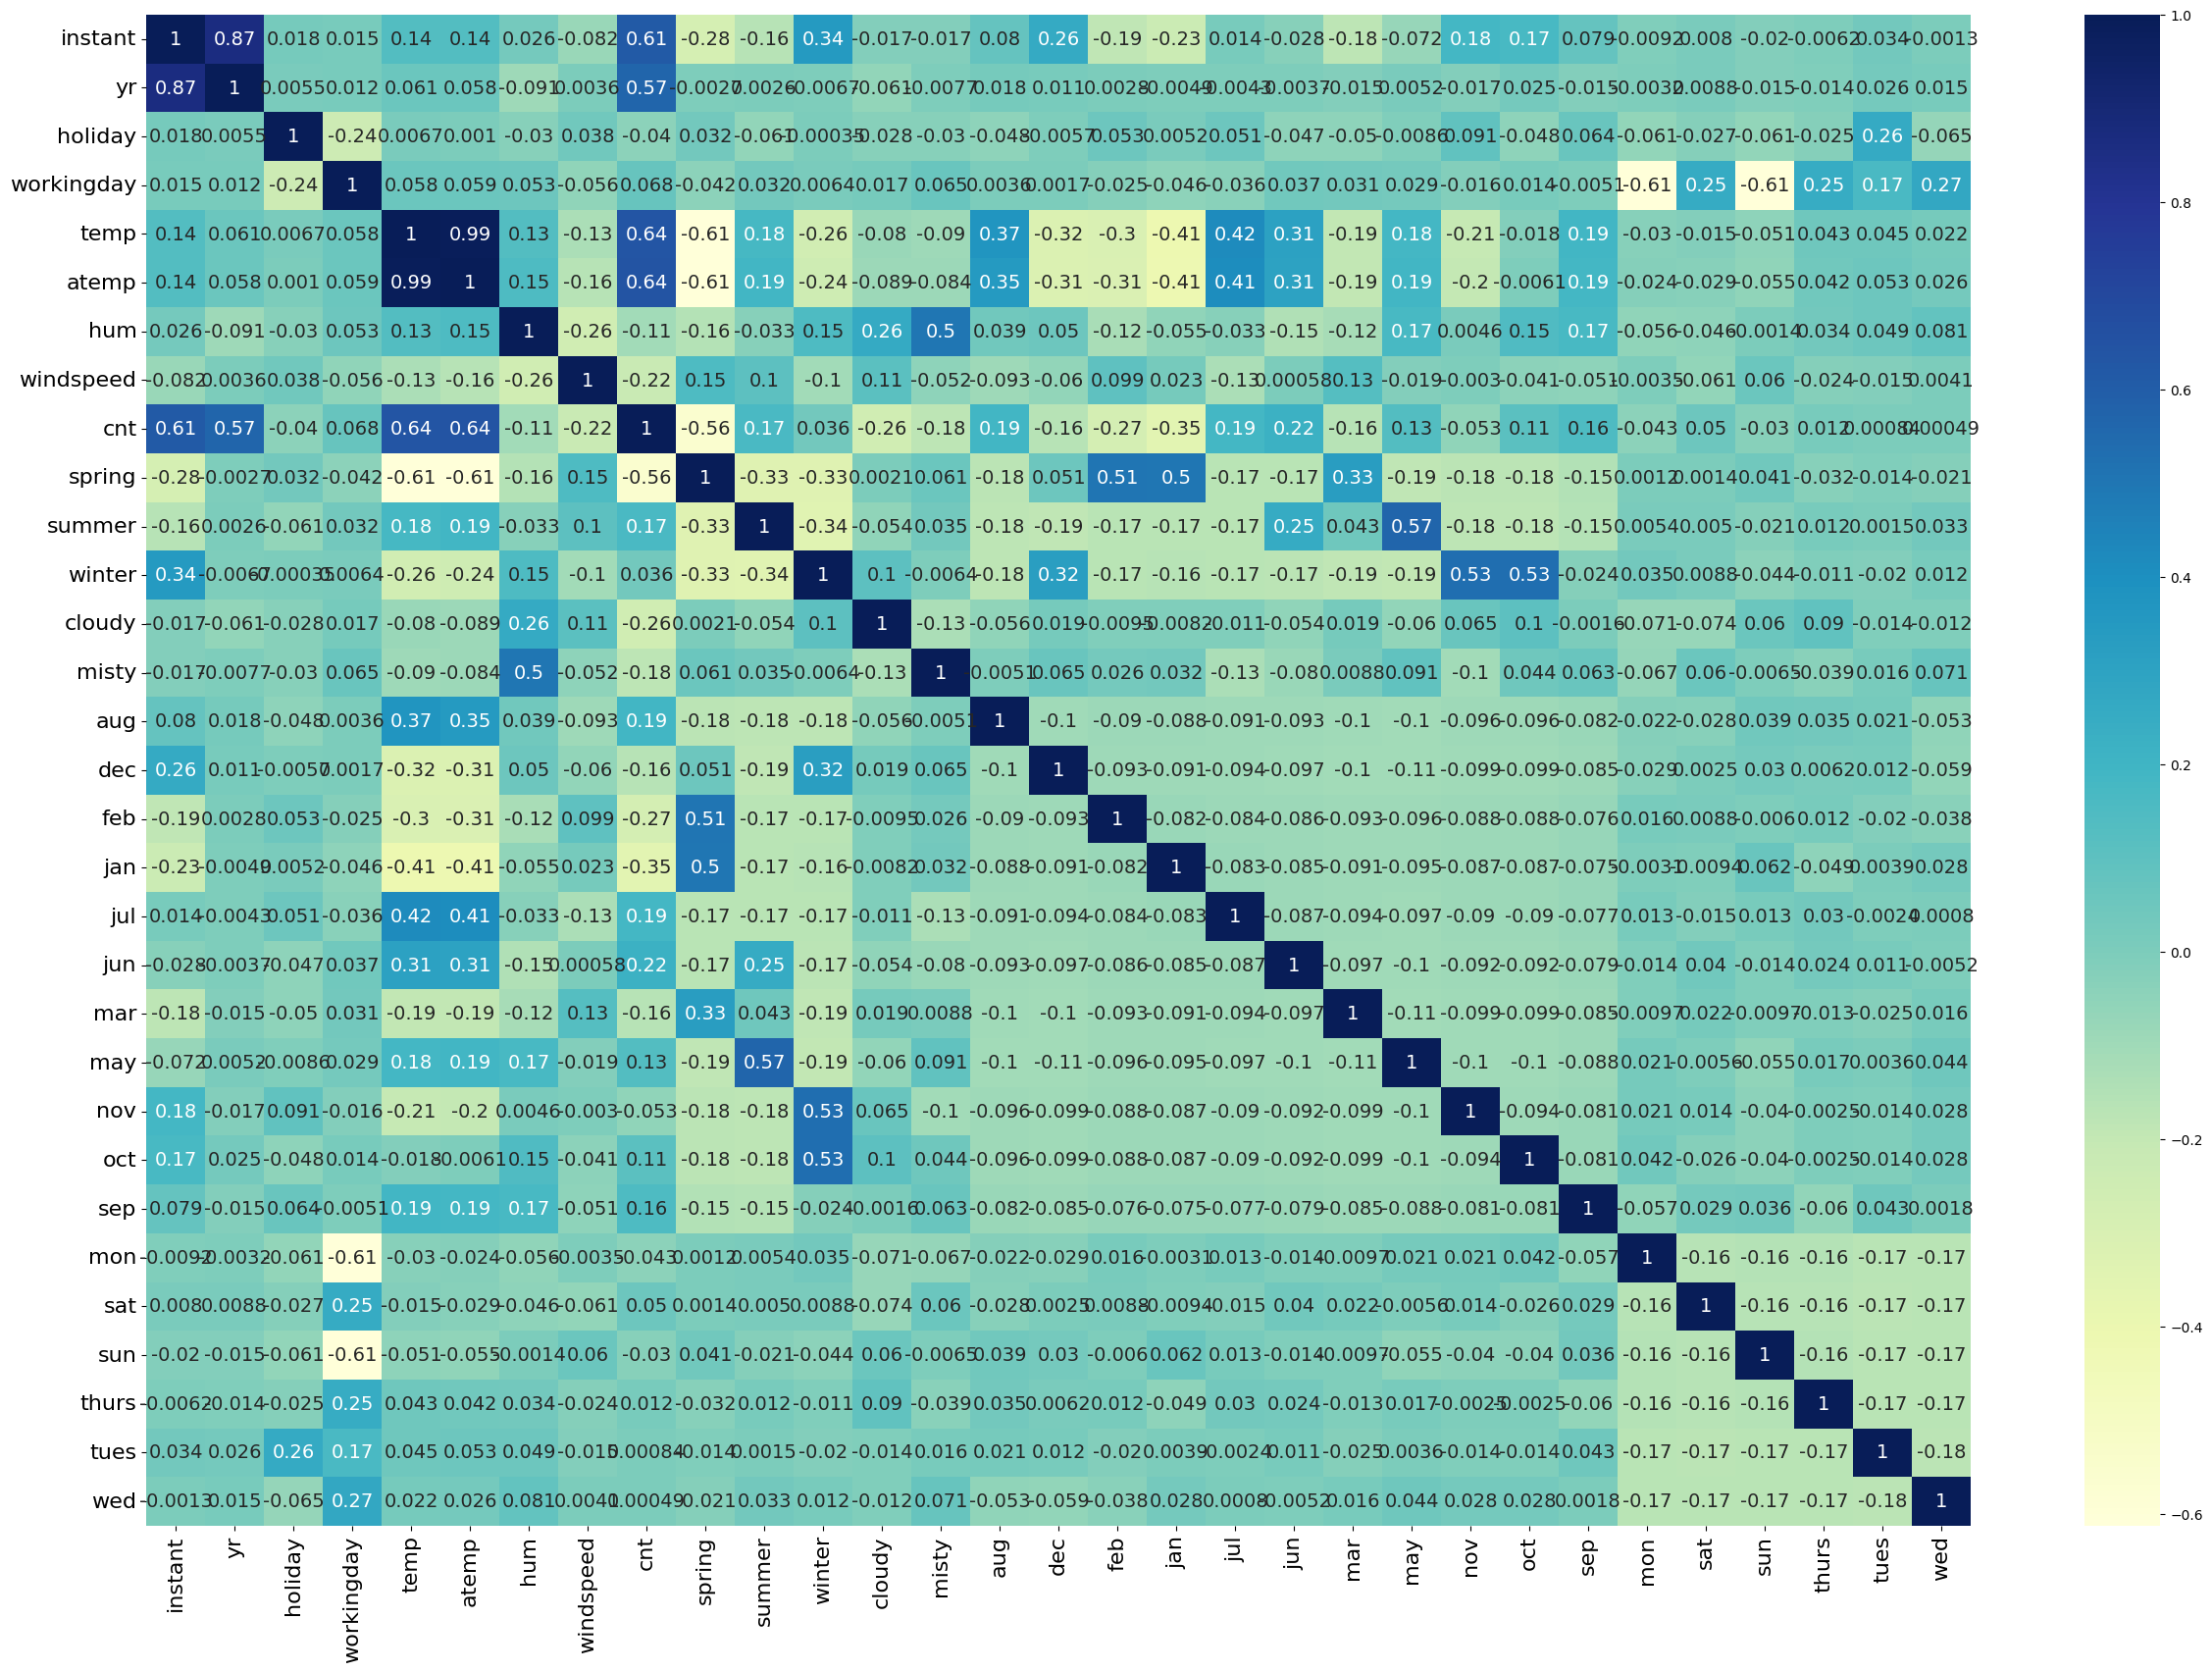

In [ ]:
#Checking linearity and corealtion in the train dataset after rescaling and dummy field conversion
# Plotting a heatmap to check linearity

plt.figure(figsize = (30, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu",annot_kws={"fontsize":14})
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()

In [ ]:
#Building our MLR model
#Model 1: Using a single selected variable - temp
# import statmodels for our MLR

import statsmodels.api as sm


In [ ]:
# Creating our feature and target variable datasets in y_train and X_train

y_train=df_train.pop('cnt')
X_train=df_train[:]

In [ ]:
# Adding a constant to X_train

X_train_lm=sm.add_constant(X_train['temp'])

In [ ]:
# Creating a LR object which we will use to fit the line

lr1 = sm.OLS(y_train, X_train_lm).fit()

In [ ]:
#Checking the summary

lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.411
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     354.0
Date:                Sat, 28 Sep 2024   Prob (F-statistic):           2.56e-60
Time:                        08:22:51   Log-Likelihood:                 176.05
No. Observations:                 510   AIC:                            -348.1
Df Residuals:                     508   BIC:                            -339.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1668      0.020      8.443      0.000       0.128       0.206
temp           0.6209      0.033     18.815      0.000       0.556       0.686
==============================================================================
Omnibus:                        9.967   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                7.009
Skew:                           0.160   Prob(JB):                       0.0301
Kurtosis:                       2.523   Cond. No.                         5.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

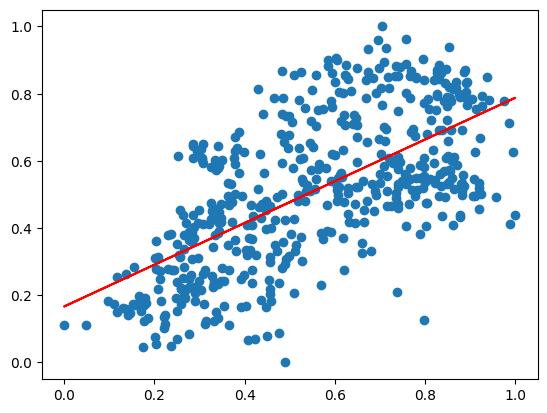

In [ ]:
# Plotting our regression line through the target variable

plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.1668 + 0.6209*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [ ]:
# importing libraries for RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [ ]:
# Creating a RFE object

lm = LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(lm,n_features_to_select=15) # setting the limit of our feature variables to 15
rfe = rfe.fit(X_train, y_train) #fitting the object on our train dataset

In [ ]:
# Result of Recursive elimination of variables and their rankings

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('instant', False, 16),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 12),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('cloudy', True, 1),
 ('misty', True, 1),
 ('aug', False, 13),
 ('dec', False, 2),
 ('feb', False, 4),
 ('jan', False, 3),
 ('jul', False, 10),
 ('jun', False, 6),
 ('mar', False, 15),
 ('may', False, 5),
 ('nov', True, 1),
 ('oct', False, 9),
 ('sep', True, 1),
 ('mon', True, 1),
 ('sat', False, 14),
 ('sun', True, 1),
 ('thurs', False, 11),
 ('tues', False, 7),
 ('wed', False, 8)]

In [ ]:
# Storing variables with significant weights in a variable

rfe_vars=X_train.columns[rfe.support_]
rfe_vars

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'cloudy', 'misty', 'nov', 'sep', 'mon', 'sun'],
      dtype='object')

In [ ]:
#Model 2: Building the model using RFE selected variables.
#Creating a train dataset using RFE variables

X_train_rfe=X_train[rfe_vars]
X_train_rfe.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,cloudy,misty,nov,sep,mon,sun
707,1,0,0,0.417140,0.933018,0.243629,0,0,1,0,1,0,0,1,0
172,0,0,1,0.865247,0.729068,0.274549,0,0,0,0,0,0,0,0,0
14,0,0,0,0.223565,0.513954,0.243603,1,0,0,0,1,0,0,0,1
204,0,0,0,0.989306,0.567625,0.267859,0,0,0,0,0,0,0,1,0
182,0,0,0,0.871664,0.458136,0.150755,0,0,0,0,0,0,0,0,1


In [ ]:
# Adding a constant to X_train_rfe

X_train_rfe=sm.add_constant(X_train_rfe)
X_train_rfe.head()

,const,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,cloudy,misty,nov,sep,mon,sun
707,1.0,1,0,0,0.417140,0.933018,0.243629,0,0,1,0,1,0,0,1,0
172,1.0,0,0,1,0.865247,0.729068,0.274549,0,0,0,0,0,0,0,0,0
14,1.0,0,0,0,0.223565,0.513954,0.243603,1,0,0,0,1,0,0,0,1
204,1.0,0,0,0,0.989306,0.567625,0.267859,0,0,0,0,0,0,0,1,0
182,1.0,0,0,0,0.871664,0.458136,0.150755,0,0,0,0,0,0,0,0,1


In [ ]:
# Creating a LR object which we will use to fit the line.

lr2 = sm.OLS(y_train, X_train_rfe).fit()

In [ ]:
#Checking the summary

lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     199.6
Date:                Sat, 28 Sep 2024   Prob (F-statistic):          3.45e-193
Time:                        08:22:52   Log-Likelihood:                 524.17
No. Observations:                 510   AIC:                            -1018.
Df Residuals:                     495   BIC:                            -954.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2204      0.028      7.971      0.000       0.166       0.275
yr             0.2296      0.008     29.083      0.000       0.214       0.245
holiday        0.0097      0.022      0.438      0.662      -0.034       0.053
workingday     0.0766      0.010      7.880      0.000       0.057       0.096
temp           0.5295      0.033     16.061      0.000       0.465       0.594
hum           -0.2223      0.037     -6.038      0.000      -0.295      -0.150
windspeed     -0.1887      0.025     -7.424      0.000      -0.239      -0.139
spring        -0.0500      0.021     -2.420      0.016      -0.091      -0.009
summer         0.0649      0.014      4.788      0.000       0.038       0.091
winter         0.1247      0.017      7.211      0.000       0.091       0.159
cloudy        -0.2053      0.026     -8.040      0.000      -0.255      -0.155
misty         -0.0426      0.011     -4.027      0.000      -0.063      -0.022
nov           -0.0312      0.017     -1.846      0.066      -0.064       0.002
sep            0.0813      0.017      4.709      0.000       0.047       0.115
mon            0.0417      0.012      3.431      0.001       0.018       0.066
sun            0.0924      0.012      7.753      0.000       0.069       0.116
==============================================================================
Omnibus:                       71.028   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.320
Skew:                          -0.724   Prob(JB):                     6.29e-38
Kurtosis:                       5.442   Cond. No.                     8.23e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.25e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
#Calculate VIF for Model 2
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_train_rfe = X_train_rfe.drop(['const'], axis=1) # Dropping constant variable from the df

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,53.92
13,mon,11.07
14,sun,10.80
6,spring,5.21
3,temp,3.81
8,winter,3.71
1,holiday,2.88
7,summer,2.30
4,hum,2.00
10,misty,1.66


In [ ]:
#Holiday, Nov and spring is having high P Value.
#lets remodel it after removing one variable at a time
# MOdel 3
# Dropping monday variable
X_train_rfe.drop(columns='holiday', inplace=True)

# Adding a constant to X_train_rfe
X_train_rfe=sm.add_constant(X_train_rfe)

# Creating a LR object which we will use to fit the line.
lr3 = sm.OLS(y_train, X_train_rfe).fit()

#Checking the summary
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     199.6
Date:                Sat, 28 Sep 2024   Prob (F-statistic):          3.45e-193
Time:                        08:22:52   Log-Likelihood:                 524.17
No. Observations:                 510   AIC:                            -1018.
Df Residuals:                     495   BIC:                            -954.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2301      0.043      5.341      0.000       0.145       0.315
yr             0.2296      0.008     29.083      0.000       0.214       0.245
workingday     0.0669      0.026      2.561      0.011       0.016       0.118
temp           0.5295      0.033     16.061      0.000       0.465       0.594
hum           -0.2223      0.037     -6.038      0.000      -0.295      -0.150
windspeed     -0.1887      0.025     -7.424      0.000      -0.239      -0.139
spring        -0.0500      0.021     -2.420      0.016      -0.091      -0.009
summer         0.0649      0.014      4.788      0.000       0.038       0.091
winter         0.1247      0.017      7.211      0.000       0.091       0.159
cloudy        -0.2053      0.026     -8.040      0.000      -0.255      -0.155
misty         -0.0426      0.011     -4.027      0.000      -0.063      -0.022
nov           -0.0312      0.017     -1.846      0.066      -0.064       0.002
sep            0.0813      0.017      4.709      0.000       0.047       0.115
mon            0.0320      0.028      1.152      0.250      -0.023       0.087
sun            0.0827      0.028      2.971      0.003       0.028       0.137
==============================================================================
Omnibus:                       71.028   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.320
Skew:                          -0.724   Prob(JB):                     6.29e-38
Kurtosis:                       5.442   Cond. No.                         26.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Model 4 ....lets removed another variable mon
# Dropping monday variable
X_train_rfe.drop(columns='mon', inplace=True)

# Adding a constant to X_train_rfe
X_train_rfe=sm.add_constant(X_train_rfe)

# Creating a LR object which we will use to fit the line.
lr4 = sm.OLS(y_train, X_train_rfe).fit()

#Checking the summary
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     214.7
Date:                Sat, 28 Sep 2024   Prob (F-statistic):          4.46e-194
Time:                        08:22:52   Log-Likelihood:                 523.49
No. Observations:                 510   AIC:                            -1019.
Df Residuals:                     496   BIC:                            -959.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2588      0.035      7.374      0.000       0.190       0.328
yr             0.2295      0.008     29.071      0.000       0.214       0.245
workingday     0.0396      0.011      3.628      0.000       0.018       0.061
temp           0.5277      0.033     16.019      0.000       0.463       0.592
hum           -0.2218      0.037     -6.022      0.000      -0.294      -0.149
windspeed     -0.1897      0.025     -7.461      0.000      -0.240      -0.140
spring        -0.0510      0.021     -2.471      0.014      -0.092      -0.010
summer         0.0651      0.014      4.800      0.000       0.038       0.092
winter         0.1250      0.017      7.223      0.000       0.091       0.159
cloudy        -0.2054      0.026     -8.041      0.000      -0.256      -0.155
misty         -0.0427      0.011     -4.042      0.000      -0.063      -0.022
nov           -0.0332      0.017     -1.981      0.048      -0.066      -0.000
sep            0.0797      0.017      4.630      0.000       0.046       0.114
sun            0.0554      0.015      3.802      0.000       0.027       0.084
==============================================================================
Omnibus:                       71.325   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              169.396
Skew:                          -0.733   Prob(JB):                     1.64e-37
Kurtosis:                       5.414   Cond. No.                         22.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Calculate VIF for Model 5
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_train_rfe = X_train_rfe.drop(['const'], axis=1) # Dropping constant variable from the df

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,29.45
2,temp,16.18
1,workingday,5.18
4,windspeed,4.83
5,spring,4.17
7,winter,3.72
6,summer,2.49
9,misty,2.39
0,yr,1.97
12,sun,1.79


In [ ]:
# Adding jan variable and building the model.
X_train_rfe['mar']=X_train['mar']

# Adding a constant to X_train_rfe
X_train_rfe=sm.add_constant(X_train_rfe)

# Creating a LR object which we will use to fit the line.
lr10 = sm.OLS(y_train, X_train_rfe).fit()

#Checking the summary
lr10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     200.5
Date:                Sat, 28 Sep 2024   Prob (F-statistic):          1.39e-193
Time:                        08:22:52   Log-Likelihood:                 525.11
No. Observations:                 510   AIC:                            -1020.
Df Residuals:                     495   BIC:                            -956.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2589      0.035      7.394      0.000       0.190       0.328
yr             0.2299      0.008     29.170      0.000       0.214       0.245
workingday     0.0388      0.011      3.564      0.000       0.017       0.060
temp           0.5254      0.033     15.971      0.000       0.461       0.590
hum           -0.2175      0.037     -5.905      0.000      -0.290      -0.145
windspeed     -0.1913      0.025     -7.536      0.000      -0.241      -0.141
spring        -0.0586      0.021     -2.786      0.006      -0.100      -0.017
summer         0.0618      0.014      4.530      0.000       0.035       0.089
winter         0.1241      0.017      7.184      0.000       0.090       0.158
cloudy        -0.2075      0.026     -8.131      0.000      -0.258      -0.157
misty         -0.0432      0.011     -4.094      0.000      -0.064      -0.022
nov           -0.0333      0.017     -1.986      0.048      -0.066      -0.000
sep            0.0793      0.017      4.618      0.000       0.046       0.113
sun            0.0553      0.015      3.803      0.000       0.027       0.084
mar            0.0256      0.014      1.778      0.076      -0.003       0.054
==============================================================================
Omnibus:                       73.300   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.045
Skew:                          -0.768   Prob(JB):                     8.78e-37
Kurtosis:                       5.336   Cond. No.                         22.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Dropping sunday variable
X_train_rfe.drop(columns='nov', inplace=True)

# Adding a constant to X_train_rfe
X_train_rfe=sm.add_constant(X_train_rfe)

# Creating a LR object which we will use to fit the line.
lr5 = sm.OLS(y_train, X_train_rfe).fit()

#Checking the summary
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     214.3
Date:                Sat, 28 Sep 2024   Prob (F-statistic):          6.57e-194
Time:                        08:22:52   Log-Likelihood:                 523.09
No. Observations:                 510   AIC:                            -1018.
Df Residuals:                     496   BIC:                            -958.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2505      0.035      7.185      0.000       0.182       0.319
yr             0.2299      0.008     29.084      0.000       0.214       0.245
workingday     0.0395      0.011      3.616      0.000       0.018       0.061
temp           0.5360      0.033     16.464      0.000       0.472       0.600
hum           -0.2196      0.037     -5.948      0.000      -0.292      -0.147
windspeed     -0.1943      0.025     -7.644      0.000      -0.244      -0.144
spring        -0.0526      0.021     -2.520      0.012      -0.094      -0.012
summer         0.0646      0.014      4.742      0.000       0.038       0.091
winter         0.1171      0.017      6.904      0.000       0.084       0.150
cloudy        -0.2063      0.026     -8.063      0.000      -0.257      -0.156
misty         -0.0409      0.011     -3.892      0.000      -0.062      -0.020
sep            0.0823      0.017      4.797      0.000       0.049       0.116
sun            0.0566      0.015      3.890      0.000       0.028       0.085
mar            0.0256      0.014      1.772      0.077      -0.003       0.054
==============================================================================
Omnibus:                       70.724   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              154.885
Skew:                          -0.754   Prob(JB):                     2.33e-34
Kurtosis:                       5.239   Cond. No.                         21.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Recalculating VIF
X_train_rfe = X_train_rfe.drop(['const'], axis=1) # Dropping constant variable from the df

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,29.30
2,temp,16.01
1,workingday,5.19
4,windspeed,4.78
5,spring,4.42
7,winter,3.37
6,summer,2.53
9,misty,2.35
0,yr,1.97
11,sun,1.79


In [ ]:
# Dropping sunday variable
X_train_rfe.drop(columns='hum', inplace=True)

# Adding a constant to X_train_rfe
X_train_rfe=sm.add_constant(X_train_rfe)

# Creating a LR object which we will use to fit the line.
lr6 = sm.OLS(y_train, X_train_rfe).fit()

#Checking the summary
lr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     214.4
Date:                Sat, 28 Sep 2024   Prob (F-statistic):          1.08e-187
Time:                        08:22:52   Log-Likelihood:                 505.52
No. Observations:                 510   AIC:                            -985.0
Df Residuals:                     497   BIC:                            -930.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1456      0.031      4.682      0.000       0.085       0.207
yr             0.2353      0.008     28.981      0.000       0.219       0.251
workingday     0.0402      0.011      3.561      0.000       0.018       0.062
temp           0.4873      0.033     14.957      0.000       0.423       0.551
windspeed     -0.1493      0.025     -5.950      0.000      -0.199      -0.100
spring        -0.0693      0.021     -3.243      0.001      -0.111      -0.027
summer         0.0554      0.014      3.962      0.000       0.028       0.083
winter         0.0952      0.017      5.560      0.000       0.062       0.129
cloudy        -0.2726      0.024    -11.450      0.000      -0.319      -0.226
misty         -0.0784      0.009     -8.985      0.000      -0.095      -0.061
sep            0.0671      0.018      3.823      0.000       0.033       0.102
sun            0.0560      0.015      3.722      0.000       0.026       0.086
mar            0.0313      0.015      2.097      0.036       0.002       0.061
==============================================================================
Omnibus:                       72.107   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.072
Skew:                          -0.763   Prob(JB):                     1.74e-35
Kurtosis:                       5.281   Cond. No.                         19.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Recalculating VIF
X_train_rfe = X_train_rfe.drop(['const'], axis=1) # Dropping constant variable from the df

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.66
1,workingday,5.09
3,windspeed,4.68
4,spring,2.57
5,summer,2.08
0,yr,1.96
6,winter,1.83
10,sun,1.75
8,misty,1.59
11,mar,1.29


In [ ]:
# Adding jan variable and building the model.
X_train_rfe['wed']=X_train['wed']

# Adding a constant to X_train_rfe
X_train_rfe=sm.add_constant(X_train_rfe)

# Creating a LR object which we will use to fit the line.
lr11 = sm.OLS(y_train, X_train_rfe).fit()

#Checking the summary
lr11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     198.6
Date:                Sat, 28 Sep 2024   Prob (F-statistic):          5.19e-187
Time:                        08:22:53   Log-Likelihood:                 506.69
No. Observations:                 510   AIC:                            -985.4
Df Residuals:                     496   BIC:                            -926.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1437      0.031      4.622      0.000       0.083       0.205
yr             0.2354      0.008     29.031      0.000       0.219       0.251
workingday     0.0439      0.012      3.805      0.000       0.021       0.067
temp           0.4887      0.033     15.014      0.000       0.425       0.553
windspeed     -0.1484      0.025     -5.922      0.000      -0.198      -0.099
spring        -0.0686      0.021     -3.211      0.001      -0.111      -0.027
summer         0.0562      0.014      4.017      0.000       0.029       0.084
winter         0.0961      0.017      5.618      0.000       0.062       0.130
cloudy        -0.2730      0.024    -11.482      0.000      -0.320      -0.226
misty         -0.0777      0.009     -8.903      0.000      -0.095      -0.061
sep            0.0673      0.018      3.841      0.000       0.033       0.102
sun            0.0561      0.015      3.728      0.000       0.027       0.086
mar            0.0314      0.015      2.112      0.035       0.002       0.061
wed           -0.0178      0.012     -1.512      0.131      -0.041       0.005
==============================================================================
Omnibus:                       72.033   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.581
Skew:                          -0.765   Prob(JB):                     3.67e-35
Kurtosis:                       5.263   Cond. No.                         20.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Recalculating VIF
X_train_rfe = X_train_rfe.drop(['const'], axis=1) # Dropping constant variable from the df

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.66
1,workingday,5.32
3,windspeed,4.68
4,spring,2.57
5,summer,2.08
0,yr,1.96
6,winter,1.83
10,sun,1.75
8,misty,1.59
11,mar,1.29


In [ ]:
# Dropping sunday variable
X_train_rfe.drop(columns='wed', inplace=True)

# Adding a constant to X_train_rfe
X_train_rfe=sm.add_constant(X_train_rfe)

# Creating a LR object which we will use to fit the line.
lr12 = sm.OLS(y_train, X_train_rfe).fit()

#Checking the summary
lr12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     214.4
Date:                Sat, 28 Sep 2024   Prob (F-statistic):          1.08e-187
Time:                        08:22:53   Log-Likelihood:                 505.52
No. Observations:                 510   AIC:                            -985.0
Df Residuals:                     497   BIC:                            -930.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1456      0.031      4.682      0.000       0.085       0.207
yr             0.2353      0.008     28.981      0.000       0.219       0.251
workingday     0.0402      0.011      3.561      0.000       0.018       0.062
temp           0.4873      0.033     14.957      0.000       0.423       0.551
windspeed     -0.1493      0.025     -5.950      0.000      -0.199      -0.100
spring        -0.0693      0.021     -3.243      0.001      -0.111      -0.027
summer         0.0554      0.014      3.962      0.000       0.028       0.083
winter         0.0952      0.017      5.560      0.000       0.062       0.129
cloudy        -0.2726      0.024    -11.450      0.000      -0.319      -0.226
misty         -0.0784      0.009     -8.985      0.000      -0.095      -0.061
sep            0.0671      0.018      3.823      0.000       0.033       0.102
sun            0.0560      0.015      3.722      0.000       0.026       0.086
mar            0.0313      0.015      2.097      0.036       0.002       0.061
==============================================================================
Omnibus:                       72.107   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.072
Skew:                          -0.763   Prob(JB):                     1.74e-35
Kurtosis:                       5.281   Cond. No.                         19.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Recalculating VIF
X_train_rfe = X_train_rfe.drop(['const'], axis=1) # Dropping constant variable from the df

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.66
1,workingday,5.09
3,windspeed,4.68
4,spring,2.57
5,summer,2.08
0,yr,1.96
6,winter,1.83
10,sun,1.75
8,misty,1.59
11,mar,1.29


In [ ]:
# Printing the feature variables used.

X_train_rfe.columns

Index(['yr', 'workingday', 'temp', 'windspeed', 'spring', 'summer', 'winter',
       'cloudy', 'misty', 'sep', 'sun', 'mar'],
      dtype='object')

In [ ]:
# Adding the constant

X_train_rfe = sm.add_constant(X_train_rfe)

In [ ]:
#Building the model

lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [ ]:
# Printing the summary

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     214.4
Date:                Sat, 28 Sep 2024   Prob (F-statistic):          1.08e-187
Time:                        08:22:53   Log-Likelihood:                 505.52
No. Observations:                 510   AIC:                            -985.0
Df Residuals:                     497   BIC:                            -930.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1456      0.031      4.682      0.000       0.085       0.207
yr             0.2353      0.008     28.981      0.000       0.219       0.251
workingday     0.0402      0.011      3.561      0.000       0.018       0.062
temp           0.4873      0.033     14.957      0.000       0.423       0.551
windspeed     -0.1493      0.025     -5.950      0.000      -0.199      -0.100
spring        -0.0693      0.021     -3.243      0.001      -0.111      -0.027
summer         0.0554      0.014      3.962      0.000       0.028       0.083
winter         0.0952      0.017      5.560      0.000       0.062       0.129
cloudy        -0.2726      0.024    -11.450      0.000      -0.319      -0.226
misty         -0.0784      0.009     -8.985      0.000      -0.095      -0.061
sep            0.0671      0.018      3.823      0.000       0.033       0.102
sun            0.0560      0.015      3.722      0.000       0.026       0.086
mar            0.0313      0.015      2.097      0.036       0.002       0.061
==============================================================================
Omnibus:                       72.107   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.072
Skew:                          -0.763   Prob(JB):                     1.74e-35
Kurtosis:                       5.281   Cond. No.                         19.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Residual Analysis
y_train_pred = lm.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

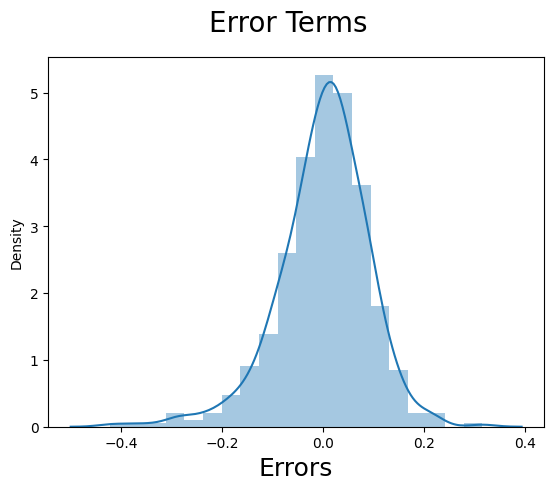

In [ ]:
# our residuals are normally distributed.
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [ ]:
## Autocorelation in residuals
#Using Durbin Watson test
# 0 < DW < 2 : positive autocorrelation
# 2 < DW < 4 : negative autocorrelation
# As we can see our Durbin-Watson test gives results close to 2 which is the ideal case for us.
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     214.4
Date:                Sat, 28 Sep 2024   Prob (F-statistic):          1.08e-187
Time:                        08:22:54   Log-Likelihood:                 505.52
No. Observations:                 510   AIC:                            -985.0
Df Residuals:                     497   BIC:                            -930.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1456      0.031      4.682      0.000       0.085       0.207
yr             0.2353      0.008     28.981      0.000       0.219       0.251
workingday     0.0402      0.011      3.561      0.000       0.018       0.062
temp           0.4873      0.033     14.957      0.000       0.423       0.551
windspeed     -0.1493      0.025     -5.950      0.000      -0.199      -0.100
spring        -0.0693      0.021     -3.243      0.001      -0.111      -0.027
summer         0.0554      0.014      3.962      0.000       0.028       0.083
winter         0.0952      0.017      5.560      0.000       0.062       0.129
cloudy        -0.2726      0.024    -11.450      0.000      -0.319      -0.226
misty         -0.0784      0.009     -8.985      0.000      -0.095      -0.061
sep            0.0671      0.018      3.823      0.000       0.033       0.102
sun            0.0560      0.015      3.722      0.000       0.026       0.086
mar            0.0313      0.015      2.097      0.036       0.002       0.061
==============================================================================
Omnibus:                       72.107   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.072
Skew:                          -0.763   Prob(JB):                     1.74e-35
Kurtosis:                       5.281   Cond. No.                         19.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'Residuals')

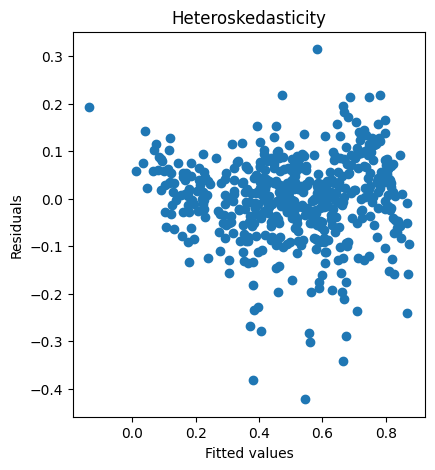

In [ ]:
# No Heteroskedasticity.
# we do not see a funnel like pattern and most of the points are centered around zero. So we do not have any heteroskedasticity.
plt.subplots(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Heteroskedasticity")
plt.scatter(y_train_pred, (y_train-y_train_pred))
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

In [ ]:
# No Multicollinearity VIF < 5

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,59.62
5,spring,5.21
3,temp,3.47
7,winter,3.39
6,summer,2.29
2,workingday,1.63
11,sun,1.63
12,mar,1.17
10,sep,1.15
4,windspeed,1.08


In [ ]:
#Printing the variables to be scaled

rescalevar

['temp', 'hum', 'windspeed', 'cnt']

In [ ]:
#Applying scaling on test data

df_test[rescalevar]=scaler.fit_transform(df_test[rescalevar])

In [ ]:
df_test.describe()

,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,...,may,nov,oct,sep,mon,sat,sun,thurs,tues,wed
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,375.707763,0.538813,0.041096,0.630137,0.539449,24.352629,0.491694,0.417532,0.493500,0.251142,...,0.050228,0.068493,0.082192,0.123288,0.164384,0.141553,0.164384,0.146119,0.123288,0.123288
std,207.909773,0.499633,0.198967,0.483873,0.249527,8.505412,0.202969,0.198978,0.248161,0.434663,...,0.218916,0.253169,0.275286,0.329520,0.371472,0.349389,0.371472,0.354034,0.329520,0.329520
min,2.000000,0.000000,0.000000,0.000000,0.000000,5.082900,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,205.500000,0.000000,0.000000,0.000000,0.327677,17.729100,0.347643,0.275323,0.330281,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,387.000000,1.000000,0.000000,1.000000,0.555134,25.599150,0.477380,0.397141,0.488651,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,553.500000,1.000000,0.000000,1.000000,0.749763,31.219275,0.632641,0.536922,0.692159,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,729.000000,1.000000,1.000000,1.000000,1.000000,42.044800,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Splitting target and feature variables

y_test = df_test.pop('cnt')
X_test = df_test[:]

In [ ]:
#Printing feature variables

X_train_rfe.columns

Index(['const', 'yr', 'workingday', 'temp', 'windspeed', 'spring', 'summer',
       'winter', 'cloudy', 'misty', 'sep', 'sun', 'mar'],
      dtype='object')

In [ ]:
#Dropping constant variable

X_train_rfe.drop(columns='const', inplace=True)

In [ ]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfe.columns]

# Adding a constant variable
X_test_new = sm.add_constant(X_test_new)

In [ ]:
# Making predictions

y_pred = lm.predict(X_test_new)

Text(0, 0.5, 'y_pred')

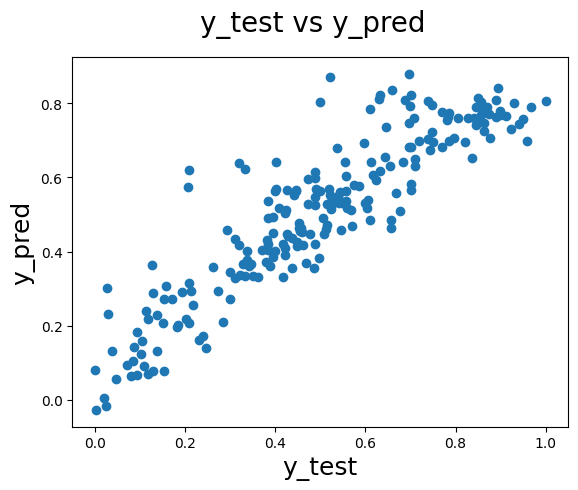

In [ ]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=18)                          # Y-label

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_true=y_train, y_pred=y_train_pred))
print(mean_squared_error(y_true=y_test, y_pred=y_pred))

0.008064286546776489
0.01180355905365202


In [ ]:
print(r2_score(y_true=y_train, y_pred=y_train_pred))
print(r2_score(y_true=y_test, y_pred=y_pred))

0.8381089815135059
0.8074541743854957
